# Download dataset

In [27]:
import datasets
import os
import numpy as np
import scipy
import matplotlib.pyplot as plt
from tqdm import tqdm

In [28]:
if os.path.exists("wikipedia_dataset"):
    dataset = datasets.load_from_disk("wikipedia_dataset")
else:
    dataset = datasets.load_dataset("wikipedia", "20220301.en")
    dataset.save_to_disk("wikipedia_dataset")

dataset = dataset["train"]
print(dataset)

Loading dataset from disk:   0%|          | 0/41 [00:00<?, ?it/s]

Dataset({
    features: ['id', 'url', 'title', 'text'],
    num_rows: 6458670
})


In [43]:
dataset[0]

{'id': '12',
 'url': 'https://en.wikipedia.org/wiki/Anarchism',
 'title': 'Anarchism',
 'text': 'Anarchism is a political philosophy and movement that is sceptical of authority and rejects all involuntary, coercive forms of hierarchy. Anarchism calls for the abolition of the state, which it holds to be unnecessary, undesirable, and harmful. As a historically left-wing movement, placed on the farthest left of the political spectrum, it is usually described alongside communalism and libertarian Marxism as the libertarian wing (libertarian socialism) of the socialist movement, and has a strong historical association with anti-capitalism and socialism.\n\nHumans lived in societies without formal hierarchies long before the establishment of formal states, realms, or empires. With the rise of organised hierarchical bodies, scepticism toward authority also rose. Although traces of anarchist thought are found throughout history, modern anarchism emerged from the Enlightenment. During the latte

In [ ]:

text_lengths = [len(dataset[i]["text"]) for i in tqdm(range(0, len(dataset)))]
text_lengths = np.array(text_lengths)
scipy.stats.describe(text_lengths)

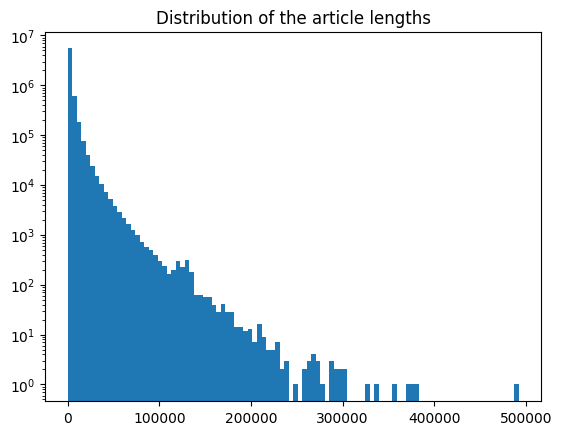

In [37]:
plt.hist(text_lengths, bins=100)
plt.yscale('log')
plt.title("Distribution of the article lengths")
plt.show()

# Split document

In [47]:
import langchain
from langchain_core.documents import Document
from langchain_text_splitters import RecursiveCharacterTextSplitter

In [ ]:
small_dataset = dataset.select(range(0, 10))

In [59]:
#Convert HuggingFace dataset to LangChain document
documents = [
    Document(page_content=doc["text"], metadata={"id": doc["id"], "url": doc["url"], "title": doc["title"]}) for doc in tqdm(small_dataset)
]

100%|██████████| 10/10 [00:00<?, ?it/s]


In [56]:
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000, chunk_overlap=200, add_start_index=True
)
all_splits = text_splitter.split_documents(documents)

len(all_splits)

613